集群中心的座標: [[2.1 2.1]
 [1.1 1.1]]
預測: [1 1 1 0 0 0]
實際: [1, 1, 1, 0, 0, 0]
預測[1,1],[2.3,2.1]: [1 0]


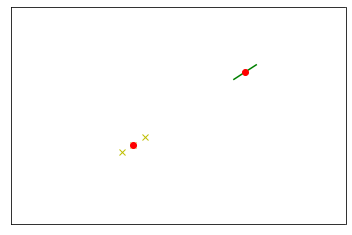

In [11]:
import numpy as np

from sklearn.model_selection import train_test_split ##匯入k-means 函式庫
from sklearn.cluster import KMeans
from time import time 

import matplotlib.pyplot as plt

from sklearn import metrics

X=np.array([[1,1],[1.1,1.1],[1.2,1.2],[2,2],[2.1,2.1],[2.2,2.2]])
y=[1,1,1,0,0,0]
kmeans = KMeans(n_clusters=2,random_state=0).fit(X)#KMeans演算法 指定2類資料
print("集群中心的座標:",kmeans.cluster_centers_)#取得集群中心的座標
print("預測:",kmeans.predict(X)) #預測
print("實際:",y)#真實答案
print("預測[1,1],[2.3,2.1]:",kmeans.predict([[1,1],[2.3,2.1]]))#預測資料

plt.axis([0,3,0,3])#用圖片顯示
plt.plot(X[:3,0],X[:3,1],'yx')#黃色點
plt.plot(X[3:,0],X[3:,1],'g')#綠色點
plt.plot(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],'ro')#顯示中心點
plt.xticks(())
plt.yticks(())
plt.show()

In [16]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split ##匯入k-means 函式庫
from sklearn.cluster import KMeans
from sklearn import metrics

#取得花資料
iris=datasets.load_iris()
##拆分資料80:20，訓練與測試用 2類標籤答案
iris_X_train,iris_X_test,iris_y_train,iris_y_test=train_test_split(iris.data,iris.target,test_size=0.2)
##KMeans 演算法 2類標籤答案
kmeans=KMeans(n_clusters=3) ##修改成3 較準
kmeans_fit=kmeans.fit(iris_X_train) ###訓練，沒有標籤答案

print("實際",iris_y_train)##顯示標籤答案
print("預測",kmeans_fit.labels_)##顯示預測答案

iris_y_train[iris_y_train==1]=11
iris_y_train[iris_y_train==0]=1
iris_y_train[iris_y_train==11]=0
print("調整",iris_y_train)#顯示調整後的預測

score=metrics.accuracy_score(iris_y_train,kmeans.predict(iris_X_train))

print('準確率{0:f}'.format(score))#顯示準確率



實際 [2 0 0 0 0 0 1 2 1 0 2 0 1 0 2 2 1 1 0 2 1 0 1 2 2 2 1 0 0 1 1 0 1 0 1 1 0
 1 2 1 1 1 2 0 2 1 2 1 0 2 0 1 1 1 2 2 0 2 0 2 0 1 0 1 0 1 1 0 1 2 0 0 2 2
 1 0 2 0 2 2 1 2 0 0 2 1 2 2 1 1 1 0 2 1 0 2 0 1 1 0 2 1 1 2 2 1 0 0 0 1 1
 0 1 2 2 2 2 2 2 0]
預測 [2 1 1 1 1 1 0 2 0 1 0 1 0 1 0 2 0 0 1 2 0 1 0 2 2 2 0 1 1 0 0 1 0 1 0 0 1
 0 0 0 0 0 2 1 2 0 2 0 1 2 1 2 0 0 2 2 1 2 1 0 1 0 1 0 1 0 0 1 0 0 1 1 0 2
 2 1 2 1 2 0 0 2 1 1 2 0 0 2 0 0 0 1 0 0 1 2 1 0 0 1 0 0 0 0 2 0 1 1 1 0 0
 1 0 2 2 2 2 2 0 1]
調整 [2 1 1 1 1 1 0 2 0 1 2 1 0 1 2 2 0 0 1 2 0 1 0 2 2 2 0 1 1 0 0 1 0 1 0 0 1
 0 2 0 0 0 2 1 2 0 2 0 1 2 1 0 0 0 2 2 1 2 1 2 1 0 1 0 1 0 0 1 0 2 1 1 2 2
 0 1 2 1 2 2 0 2 1 1 2 0 2 2 0 0 0 1 2 0 1 2 1 0 0 1 2 0 0 2 2 0 1 1 1 0 0
 1 0 2 2 2 2 2 2 1]
準確率0.883333


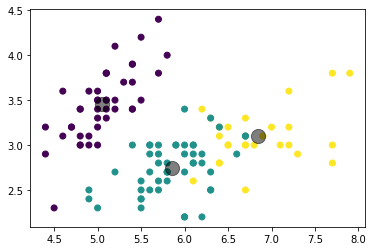

In [15]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split ##匯入k-means 函式庫
from sklearn.cluster import KMeans
from sklearn import metrics

#Load the diabetes dataset
iris=datasets.load_iris()

iris_X_train,iris_X_test,iris_y_train,iris_y_test=train_test_split(iris.data,iris.target,test_size=0.2)

#KMeans 演算法
kmeans =KMeans(n_clusters=3)
kmeans.fit(iris_X_train)
y_predict=kmeans.predict(iris_X_train)

x1=iris_X_train[:,0]#花萼長度
y1=iris_X_train[:,1]#花萼寬度
plt.scatter(x1,y1,c=y_predict,cmap='viridis')#畫每一筆位置
centers=kmeans.cluster_centers_ #每個分類中心點
plt.scatter(centers[:,0],centers[:,1],c='black',s=200,alpha=0.5)#劃出中心點
plt.show()#顯示圖片